<a href="https://colab.research.google.com/github/prithvi-diwanji/NLP2024_exercises/blob/main/10_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#prithvi diwanji
# 5 june classwork


In [3]:
import matplotlib.pyplot as plt

In [4]:
img = plt.imread('Flag_of_India.svg.png')

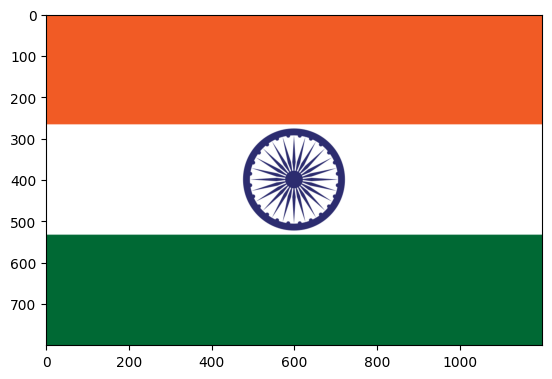

In [5]:
plt.imshow(img)

In [6]:
img.shape

(800, 1200, 3)

In [8]:
img

array([[[0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        ...,
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805]],

       [[0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        ...,
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805]],

       [[0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        ...,
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805]],

       ...,

       [[0.        , 0.4117647 , 0.20392157],
        [0.        , 0.4117647 , 0.20392157],
        [0.        , 0

In [11]:
#refer to : https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks#

In [12]:
#use keras data set - scanned images to be impoted


In [58]:
#import libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import numpy as np

In [15]:
#load the dataset

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [18]:
x_train.shape

(60000, 28, 28)

In [19]:
y_train.shape

(60000,)

In [21]:
x_test.shape
y_test.shape

(10000,)

In [22]:
#this is small images of hand written text

5

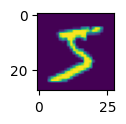

In [26]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[0])
y_train[0]

5

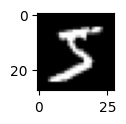

In [27]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[0], cmap='gray')
y_train[0]

In [30]:
#such 60000 images are there for each number(0-, handwritten and cscanned), scanned and ready as data set

In [31]:
y_train[23]

1

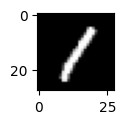

In [32]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[23], cmap='gray')


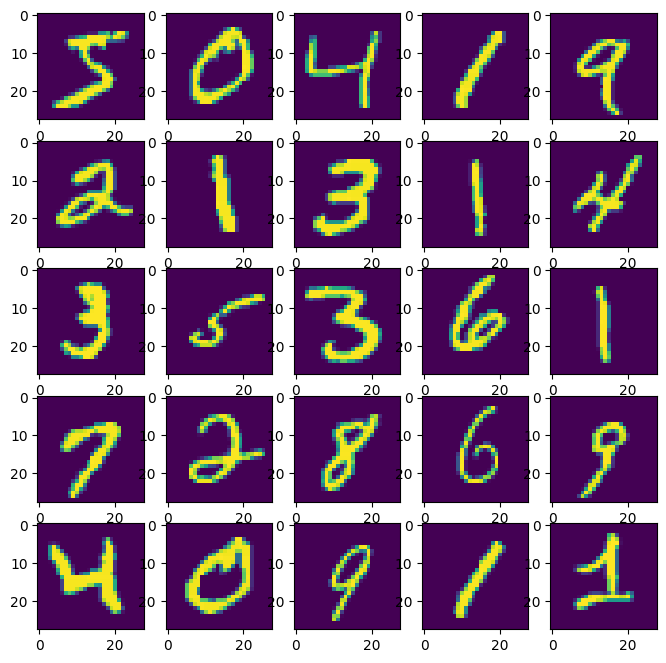

In [34]:
###explore the images and their label also
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.imshow(x_train[i])

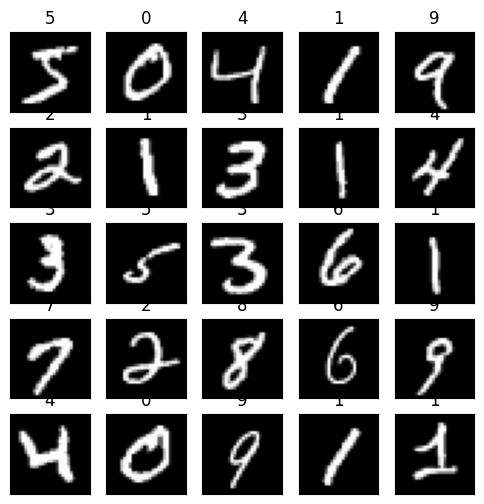

In [37]:
# add title
plt.figure(figsize=(6,6)) #aspect ratio of display only
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(y_train[i])
  plt.imshow(x_train[i], cmap='gray')

Data Preparation

In [39]:
#normalize the data - min value for each pxel is  and max is 255

In [40]:
from re import X
#normalize
x_train = x_train/255
x_test =x_test/255

In [42]:
#width height, color layers in each image??? -3 layers - RGB

In [43]:
img.shape

(800, 1200, 3)

In [44]:
x_train[0].shape

(28, 28)

In [45]:
#this is a grayscale image so only 2

In [46]:
#but neural data needs data in 3 dimensions, 3 layers - this has black white and gray only

In [48]:
#so what to do? - use reshape data - add a layer

In [50]:
#reshape
x_train = x_train.reshape(-1, 28,28, 1) # -1 means dont change 60000, last 1 means add ablack layer to all
x_test = x_test.reshape(-1, 28,28, 1)

In [51]:
x_train.shape

(60000, 28, 28, 1)

In [52]:
x_test.shape

(10000, 28, 28, 1)

In [53]:
#outout varuable contain 10 classes

Build the CNN model

In [59]:
#create the model
model =Sequential()

#first convolutional layer
conv1 =Conv2D(filters=32, input_shape=(28,28,1), kernel_size=(3,3), activation ='relu')
model.add(conv1)

#first pooling layer
pool1 =MaxPool2D(pool_size=(2,2))
model.add(pool1)

#second convolutional layer
conv2 =Conv2D(filters=64, kernel_size=(3,3), activation ='relu')
model.add(conv2)

#second pooling layer
pool2 =MaxPool2D(pool_size=(2,2))
model.add(pool2)

#flatten the layers
model.add(Flatten())

#buld the CNN
model.add(Dense(64, activation ='relu'))

#final outout layer of 1o classes softmax
model.add(Dense(10, activation ='softmax')) #output is already in number format




In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)               

In [61]:
#comile the model  input data is 2 dim and op is 1 dim

In [62]:
model.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [63]:
#train the model
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 76s 12ms/step - loss: 0.1130 - accuracy: 0.9652
Epoch 2/10
6000/6000 [==============================] - 74s 12ms/step - loss: 0.0413 - accuracy: 0.9872
Epoch 3/10
6000/6000 [==============================] - 73s 12ms/step - loss: 0.0276 - accuracy: 0.9915
Epoch 4/10
6000/6000 [==============================] - 74s 12ms/step - loss: 0.0204 - accuracy: 0.9931
Epoch 5/10
6000/6000 [==============================] - 74s 12ms/step - loss: 0.0156 - accuracy: 0.9951
Epoch 6/10
6000/6000 [==============================] - 72s 12ms/step - loss: 0.0132 - accuracy: 0.9956
Epoch 7/10
6000/6000 [==============================] - 72s 12ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 8/10
6000/6000 [==============================] - 73s 12ms/step - loss: 0.0106 - accuracy: 0.9967
Epoch 9/10
6000/6000 [==============================] - 73s 12ms/step - loss: 0.0081 - accuracy: 0.9975
Epoch 10/10
6000/6000 [==============================] - 75s 12m

In [64]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 26s 3ms/step - loss: 0.0519 - accuracy: 0.9885


[0.05185222253203392, 0.9884999990463257]

In [79]:
#get a random image and plot it
(x_train, y_train),(x_test, y_test) = mnist.load_data()
new=x_train[4570]

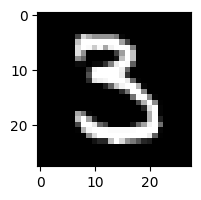

In [80]:
plt.figure(figsize=(2,2))
plt.imshow(new, cmap ='gray')

In [82]:
#convert the image and transform it  - first we divide by 225, reshaped etc
#try different image numbers
(x_train, y_train),(x_test, y_test) = mnist.load_data()
new = x_train[4571]
new= new/255
new = new.reshape (1, 28,28,1)
result =model.predict(new, verbose=False)
np.argmax(result)

7

In [84]:
# can be used to do sentiment analysis